In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F


import os
import numpy as np
import math

from Stationary.core import *
from utils.dataset_utils import *
from model.model_creation import *
from model.model_train import *

from sklearn import linear_model, datasets
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt

import torch.nn.functional as F
import copy

from collections import defaultdict

from torch.autograd import Variable





np.random.seed(0)
torch.manual_seed(0)

In [2]:
test_family = 'NonLinearModel_LinearTask'
test_name = 'test5'

In [3]:
import concurrent.futures
import multiprocessing as mp

from generator import *

iterations = 5

if __name__ == '__main__':
  
    SEEDS = np.linspace(1, iterations, iterations, dtype=int).tolist()

    error_list = []
    score_list = []
    error_list_fedavg = []
    score_list_fedavg = []

    with concurrent.futures.ProcessPoolExecutor(max_workers=mp.cpu_count(), mp_context=mp.get_context("spawn")) as executor:
            for error, score, error_fedavg, score_fedavg in executor.map(single_iteration, SEEDS):
                error_list.append(error)
                score_list.append(score)
                error_list_fedavg.append(error_fedavg)
                score_list_fedavg.append(score_fedavg)

In [4]:
err = []
err_std = []
for i in range(0, len(error_list[0])):
    s = 0
    e = []
    for k in error_list:
        s += k[i]
        e.append(k[i])
    err.append(s / len(error_list))
    err_std.append(np.std(e))

sc = []
sc_std = []
for i in range(0, len(score_list[0])):
    s = 0
    e = []
    for k in score_list:
        s += k[i]
        e.append(k[i])
    sc.append(s / len(score_list))
    sc_std.append(np.std(e))

err_s = []
err_s_std = []
for i in range(0, len(error_list_fedavg[0])):
    s = 0
    e = []
    for k in error_list_fedavg:
        s += k[i]
        e.append(k[i])
    err_s.append(s / len(error_list_fedavg))
    err_s_std.append(np.std(e))

sc_s = []
sc_s_std = []
for i in range(0, len(score_list_fedavg[0])):
    s = 0
    e = []
    for k in score_list_fedavg:
        s += k[i]
        e.append(k[i])
    sc_s.append(s / len(score_list_fedavg))
    sc_s_std.append(np.std(e))

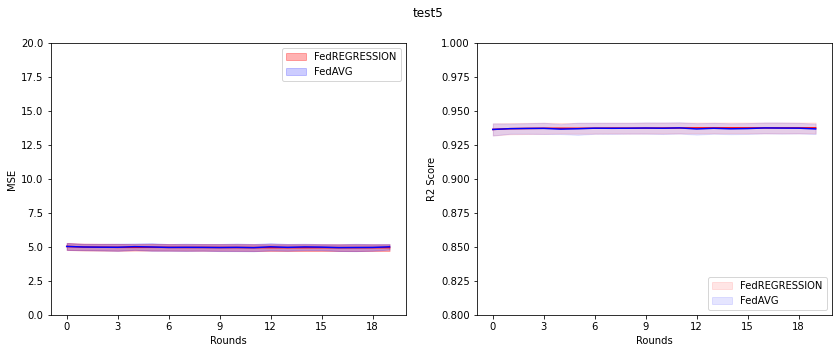

In [5]:
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator

#plt.figure(figsize=(20,5))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle(test_name)


x = np.arange(len(error_list[0]))

ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))


ax1.fill_between(x, np.array(err)+np.array(err_std), np.array(err)-np.array(err_std), color='red', label='FedREGRESSION', alpha=0.3)
ax1.fill_between(x, np.array(err_s)+np.array(err_s_std), np.array(err_s)-np.array(err_s_std), color='blue', label='FedAVG', alpha=0.2)
ax1.plot(x, err, color='red')
ax1.plot(x, err_s, color='blue')

ax1.legend(loc='upper right')

ax1.set_xlabel("Rounds")
ax1.set_ylabel("MSE")


ax1.set_ylim(ymin=0, ymax=20)


ax2.fill_between(x, np.array(sc)+np.array(sc_std), np.array(sc)-np.array(sc_std), color='red', label='FedREGRESSION', alpha=0.1)
ax2.fill_between(x, np.array(sc_s)+np.array(sc_s_std), np.array(sc_s)-np.array(sc_s_std), color='blue', label='FedAVG', alpha=0.1)
ax2.plot(x, sc, color='red')
ax2.plot(x, sc_s, color='blue')
ax2.legend(loc='lower right')

ax2.set_xlabel("Rounds")
ax2.set_ylabel("R2 Score")
ax2.set_ylim(ymin=0.8, ymax=1)




plt.draw()

plt.savefig("Results/Stationary/"+test_family+"/plots/"+test_name+"_.svg")

In [6]:
import pandas as pd


d = {'Error_FedREG': err, 
     'Error_FedREG_std': err_std,
     'Score_FedREG': sc, 
     'Score_FedREG_std': sc_std,
     'Error_FedAVG': err_s, 
     'Error_FedAVG_std': err_s_std,
     'Score_FedAVG': sc_s, 
     'Score_FedAVG_std': sc_s_std}

df = pd.DataFrame(data=d)

df.to_csv("Results/Stationary/"+test_family+"/data/"+test_name+"_.csv", index=False)

In [7]:
pd.read_csv("Results/Stationary/"+test_family+"/data/"+test_name+"_.csv")

,Error_FedREG,Error_FedREG_std,Score_FedREG,Score_FedREG_std,Error_FedAVG,Error_FedAVG_std,Score_FedAVG,Score_FedAVG_std
0,5.029910,0.255786,0.936392,0.004480,5.029910,0.255786,0.936392,0.004480
1,4.986034,0.248157,0.936967,0.004113,4.989155,0.227666,0.936941,0.003721
2,4.973884,0.248370,0.937123,0.004072,4.975649,0.238295,0.937107,0.003861
3,4.963986,0.249784,0.937248,0.004084,4.968959,0.260093,0.937188,0.004143
4,4.964153,0.234043,0.937251,0.003859,5.014050,0.232567,0.936634,0.003633
5,4.966521,0.241259,0.937220,0.003941,4.990142,0.277560,0.936908,0.004518
6,4.961838,0.241229,0.937277,0.003969,4.957675,0.244893,0.937322,0.004117
7,4.955473,0.239810,0.937358,0.003943,4.964892,0.264221,0.937241,0.004133
8,4.957790,0.243071,0.937327,0.003996,4.960048,0.245035,0.937298,0.004024
9,4.953703,0.244051,0.937379,0.004001,4.949312,0.258342,0.937431,0.004184
